In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [5]:
df_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.0,3.0,NaN


In [6]:
df_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1185.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.000,0.0,NaN
3,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
4,tt0114722,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,276251.0,es,3 Noches,...,0.0,105.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,3 Nights,0.0,0.000,0.0,NaN


### Exploratory Data Analysis

1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
3. What is the average revenue per certification category?
4. What is the average budget per certification category?

In [9]:
# Concatenate the data into 1 dataframe for the remainder of the analysis.
df_merged = pd.concat([df_2000, df_2001], axis=0)
df_merged.head(5)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.0,3.0,NaN


1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

378 movies had valid financial informations

In [20]:
# filter for revenue and budget greater than 0
new_df = df_merged[(df_merged.revenue > 0) & ( df_merged.budget > 0)].dropna(subset = ['revenue', 'budget'])
new_df[['revenue', 'budget']].head(10)

,revenue,budget
5,12854953.0,150000.0
14,14904.0,120000.0
17,224834564.0,45000000.0
20,105983.0,8000000.0
21,546388105.0,125000000.0
22,296339527.0,75000000.0
23,36754634.0,75000000.0
24,169327687.0,100000000.0
26,36609995.0,24000000.0
29,327418.0,8500000.0


In [21]:
len(new_df)

378

Movies with 0's and null values for budget AND revenue have been excluded from the remaining

2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [23]:
# movie counts in certification
movie_counts = new_df['certification'].value_counts()
movie_counts

R        144
PG-13    117
PG        30
G         13
NR         7
Name: certification, dtype: int64

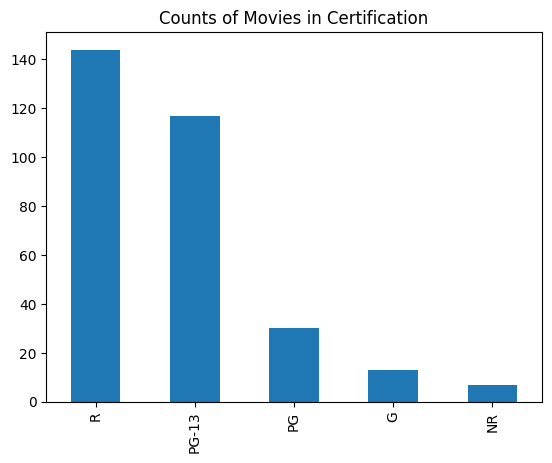

In [26]:
# Bar plots
movie_counts.plot(kind= 'bar')
plt.title('Counts of Movies in Certification');

From th Visual R category have the highest movie and NR have the least

3. What is the average revenue per certification category?

In [31]:
certification_revenue = new_df.groupby('certification')['revenue'].mean().sort_values(ascending= False)
certification_revenue

certification
G        1.332169e+08
PG       1.290806e+08
PG-13    1.111018e+08
R        5.173584e+07
NR       2.212257e+07
Name: revenue, dtype: float64

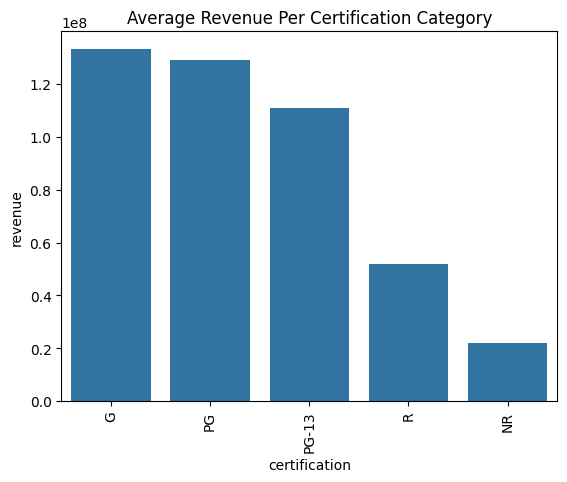

In [37]:
# Barchart in bivariate form
bar_order = certification_revenue.index
base_color = sb.color_palette()[0]
sb.barplot(data= new_df, x='certification', y='revenue', color=base_color, order= bar_order, errorbar=None)
plt.xticks(rotation=90)
plt.title('average revenue per certification category'.title());

G and PG category have the highest revenue

4. What is the average budget per certification category?

In [40]:
certification_budget = new_df.groupby('certification')['budget'].mean().sort_values(ascending= False)
certification_budget

certification
PG       5.197491e+07
PG-13    4.662733e+07
G        4.400000e+07
R        2.675774e+07
NR       1.352857e+07
Name: budget, dtype: float64

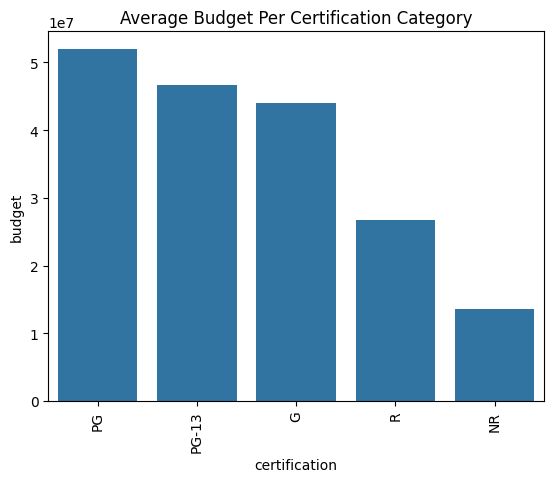

In [42]:
# Barchart in bivariate form
bar_order = certification_budget.index
base_color = sb.color_palette()[0]
sb.barplot(data= new_df, x='certification', y='budget', color=base_color, order= bar_order, errorbar=None)
plt.xticks(rotation=90)
plt.title('average budget per certification category'.title());

PG have the highest budget, next is PG-13. NR have the least budget